<a href="https://colab.research.google.com/github/RedBatProject/Works/blob/main/work81image._2ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c cassava-disease

100% 2.30G/2.30G [02:25<00:00, 22.4MB/s]
100% 2.30G/2.30G [02:25<00:00, 17.0MB/s]


In [ ]:
# !mv /content/cassava-disease.zip /content/drive/MyDrive/work81image/

In [1]:
!unzip /content/drive/MyDrive/work81image/cassava-disease.zip

Archive:  /content/drive/MyDrive/work81image/cassava-disease.zip
  inflating: extraimages.zip         
  inflating: random.txt              
  inflating: sample_submission_file.csv  
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
!unzip /content/train.zip
# !unzip /content/test.zip

In [3]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_path = '/content/train/'   # cmd, healthy, cgm, cbsd, cbb 2658+316+773+1443+466 == 6122
# test_path = '/content/test/0'
print(len(os.listdir(train_path)))
# print(len(os.listdir(test_path)))

5


In [82]:
split_size = 4897 #80-20
BATCH_SIZE = 70
train_dir = train_path
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.25
)

validation_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [83]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (150,150),
    shuffle = True,
    subset = 'validation'
)

Found 4244 images belonging to 5 classes.
Found 1412 images belonging to 5 classes.


In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 16)        9232      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 20736)             0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [92]:
history = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator

<ipython-input-92-6d79790d1226>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
61/61 [==============================] - 53s 824ms/step - loss: 1.6049 - accuracy: 0.4093 - val_loss: 1.3333 - val_accuracy: 0.4703
Epoch 2/30
61/61 [==============================] - 52s 850ms/step - loss: 1.3659 - accuracy: 0.4649 - val_loss: 1.2425 - val_accuracy: 0.4958
Epoch 3/30
61/61 [==============================] - 50s 831ms/step - loss: 1.3053 - accuracy: 0.4929 - val_loss: 1.2512 - val_accuracy: 0.5489
Epoch 4/30
61/61 [==============================] - 48s 789ms/step - loss: 1.2634 - accuracy: 0.5134 - val_loss: 1.1954 - val_accuracy: 0.5559
Epoch 5/30
61/61 [==============================] - 51s 843ms/step - loss: 1.2352 - accuracy: 0.5344 - val_loss: 1.4006 - val_accuracy: 0.4455
Epoch 6/30
61/61 [==============================] - 49s 793ms/step - loss: 1.2113 - accuracy: 0.5386 - val_loss: 1.1335 - val_accuracy: 0.5659
Epoch 7/30
61/61 [==============================] - 47s 781ms/step - loss: 1.2013 - accuracy: 0.5537 - val_loss: 1.1468 - val_accuracy: 0.5687

In [93]:
s1 = model.predict(validation_generator)

21/21 [==============================] - 11s 536ms/step


In [94]:
data_list = []
batch_index = 0

while batch_index <= validation_generator.batch_index:
    data = validation_generator.next()
    data_list.append(list(data[1]))
    batch_index = batch_index + 1

In [95]:
p = pd.DataFrame()
p['label'] = np.concatenate(data_list)
for i in range(s1.shape[1]):
    p[f'pr_{i}'] = s1.T[i]

In [67]:
p.to_csv(f'{path}_modelCNN3res.csv',index=False)

In [25]:
import numpy as np

In [12]:
path = '/content/drive/MyDrive/work81image/res/'

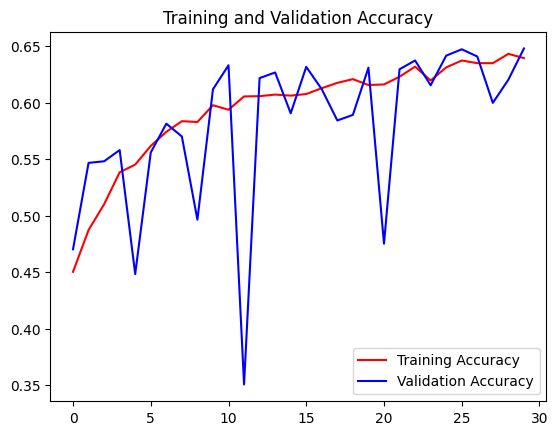

<Figure size 640x480 with 0 Axes>

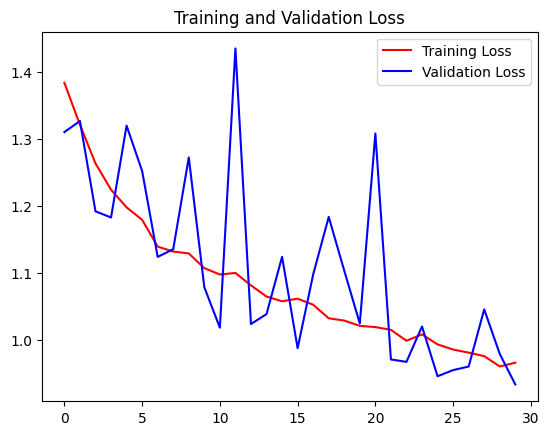

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.savefig(f'{path}trvlacc_3CNN2Dence.png',bbox_inches='tight')
plt.show()
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()
plt.savefig(f'{path}trvlacc3CNN2Dence.png',bbox_inches='tight')
plt.show()

In [ ]:
#get data
train_paths=[]
train_labels=[]
for root,dir,files in os.walk("/content/train"):
    for file in files:
        train_paths.append(os.path.join(root,file))
        train_labels.append(root.split("/")[-1])

# test_paths=[]
# for root,dir,files in os.walk("../input/test"):
#     for file in files:
#         test_paths.append(os.path.join(root,file))

print(train_paths[:5])
# print(test_paths[:5])

In [ ]:
#function to preprocess images and labels
def preprocess_image(image,image_shape=[192,192]):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, image_shape)
  image /= 255.0  # normalize to [0,1] range
  return image


def load_and_preprocess_image(file,image_shape):
    image = tf.io.read_file(file)
    return preprocess_image(image,image_shape)

labs2index={'cbb':0, 'cbsd':1, 'cgm':2, 'cmd':3, 'healthy':4}
index2labs={0:'cbb', 1:'cbsd', 2:'cgm', 3:'cmd', 4:'healthy'}
def process_labels(lab):
    print(lab)
    return tf.one_hot(lab,depth=len(labs2index))

In [ ]:
#create tensorflow data objects
train_ds = tf.data.Dataset.from_tensor_slices(train_paths)
# test_ds=tf.data.Dataset.from_tensor_slices(test_paths)
train_image_ds = train_ds.map(lambda x:load_and_preprocess_image(x,image_shape=[192,192]),num_parallel_calls=AUTOTUNE)
# test_image_ds=test_ds.map(lambda x:load_and_preprocess_image(x,image_shape=[192,192]),num_parallel_calls=AUTOTUNE)

train_label_ds=tf.data.Dataset.from_tensor_slices([labs2index[i] for i in train_labels]).map(process_labels,num_parallel_calls=AUTOTUNE)
image_label_ds=tf.data.Dataset.zip((train_image_ds,train_label_ds))

BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=len(train_paths))
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=AUTOTUNE)

# ds_test=test_image_ds.batch(BATCH_SIZE)
print(ds)
# print(test_ds)

In [68]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (192, 192),
    shuffle = True,
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = BATCH_SIZE,
    class_mode = 'sparse',
    target_size = (192, 192),
    shuffle = True,
    subset = 'validation'
)

Found 4244 images belonging to 5 classes.
Found 1412 images belonging to 5 classes.


In [73]:
#use pretrained model
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
#mobile_net.trainable=False

def change_range(image,label):
  return 2*image-1, label

# keras_ds = ds.map(change_range)
# keras_ds = ds

# keras_test=ds_test.map(lambda x:2*x-1)


#image_batch, label_batch = next(iter(keras_ds))

model = tf.keras.Sequential([
    mobile_net,
    tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5,activation=tf.nn.softmax)])

model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_192 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2422597 (9.24 MB)
Trainable params: 2388485 (9.11 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________
None


In [74]:
model.layers[0].trainable = False

In [75]:
model.compile(optimizer=RMSprop(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_192 (Func  (None, 6, 6, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 128)               163968    
                                                                 
 dense_9 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2422597 (9.24 MB)
Trainable params: 164613 (643.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
None


In [76]:
history = model.fit_generator(train_generator,
                             epochs=30,
                             verbose=1,
                             validation_data=validation_generator) #vadidation_generator

<ipython-input-76-6d79790d1226>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/30
61/61 [==============================] - 73s 1s/step - loss: 1.2398 - accuracy: 0.5540 - val_loss: 0.9254 - val_accuracy: 0.6508
Epoch 2/30
61/61 [==============================] - 66s 1s/step - loss: 0.9453 - accuracy: 0.6447 - val_loss: 0.8383 - val_accuracy: 0.6834
Epoch 3/30
61/61 [==============================] - 65s 1s/step - loss: 0.8747 - accuracy: 0.6730 - val_loss: 0.9012 - val_accuracy: 0.6813
Epoch 4/30
61/61 [==============================] - 68s 1s/step - loss: 0.8492 - accuracy: 0.6793 - val_loss: 0.8521 - val_accuracy: 0.6721
Epoch 5/30
61/61 [==============================] - 67s 1s/step - loss: 0.8144 - accuracy: 0.6892 - val_loss: 0.8707 - val_accuracy: 0.6933
Epoch 6/30
61/61 [==============================] - 68s 1s/step - loss: 0.7877 - accuracy: 0.7064 - val_loss: 0.8675 - val_accuracy: 0.6785
Epoch 7/30
61/61 [==============================] - 69s 1s/step - loss: 0.7795 - accuracy: 0.7050 - val_loss: 0.7621 - val_accuracy: 0.7061
Epoch 8/30
61/61 [==

In [78]:
# 59-11_69-17_-_-_-_

In [77]:
s1 = model.predict(validation_generator)

21/21 [==============================] - 17s 778ms/step


In [79]:
data_list = []
batch_index = 0

while batch_index <= validation_generator.batch_index:
    data = validation_generator.next()
    data_list.append(list(data[1]))
    batch_index = batch_index + 1

In [80]:
p = pd.DataFrame()
p['label'] = np.concatenate(data_list)
for i in range(s1.shape[1]):
    p[f'pr_{i}'] = s1.T[i]

In [81]:
p.to_csv(f'{path}_MobileNetV2res.csv',index=False)

In [ ]:
#fit model for 50 epochs
model.fit(keras_ds, epochs=50, steps_per_epoch=176)

In [ ]:
#make predictions
test_predictions=model.predict(keras_test,steps=int(np.ceil(len(test_paths)/BATCH_SIZE)))
predictions=np.argmax(test_predictions,axis=1)

In [ ]:
#make submission
my_submission = pd.DataFrame({'Category':[index2labs[j] for j in predictions],'Id':[i.split("/").pop() for i in test_paths]})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)
print(my_submission.head())

In [ ]:
# https://www.sciencedirect.com/science/article/pii/S1110866520301110
# https://www.kaggle.com/c/cassava-disease/data